<a href="https://colab.research.google.com/github/ErascusPlatypus/group_my_tabs/blob/main/organize_tabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!gdown "https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku"

Downloading...
From (original): https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku
From (redirected): https://drive.google.com/uc?id=1BpfbHu4denceXiv8yfdY3EHgjKIcULku&confirm=t&uuid=bfb6ef53-0da0-4873-bb28-5ca703fe91c4
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:28<00:00, 58.3MB/s]


In [ ]:
embedding_file = './GoogleNews-vectors-negative300.bin.gz'

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

In [ ]:
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'cheese'))

0.35505623
0.36959887
0.47083578


In [ ]:
word_vectors.n_similarity("dog bites man".split(), "canine nips human".split())

0.5314661

In [ ]:
s1 = "Volkswagen intends to double electric car sales in China".lower().split()
s2 = 'rtificial intelligence has gone through many cycles of hype, but even to skeptics, the release of ChatGPT seems to mark a turning point. The last time generative AI loomed this large, the breakthroughs were in computer vision, but now the leap forward is in natural language processing (NLP). Today, generative AI can learn and synthesize not just human language but other data types including images, video, software code, and even molecular structures.'.lower().split()
word_vectors.n_similarity(s1, s2)

0.4276027

In [ ]:
s1 = 'The growing use of artificial intelligence in the ntegration of AI systems into various economic sectors and areas of life,  disinformation. This raises questions about the long-term effects, ethical implications, and risks of AI, prompting discussions about regulatory policies to ensure the safety and benefits of the technology. '.lower().split()
s2 = 'Talking Tech and AI with Tim Cook!'.lower().split()

word_vectors.n_similarity(s1, s2)

0.40277302

In [ ]:
word_vectors.most_similar(positive=['cell', 'phone'], topn=10)

[('cell_phone', 0.6861391067504883),
 ('cellular', 0.6757438778877258),
 ('cellphone', 0.6633196473121643),
 ('telephone', 0.6474039554595947),
 ('Phone', 0.605189323425293),
 ('phones', 0.5896332859992981),
 ('cells', 0.585094690322876),
 ('cordless_phone', 0.5711769461631775),
 ('Cell', 0.5617641806602478),
 ('landline', 0.5467296242713928)]

In [ ]:
word_vectors.doesnt_match(["Microsoft", "Apple", "Toyota", "Amazon", "Netflix", "Google"])

'Toyota'

In [ ]:
def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', s=128)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

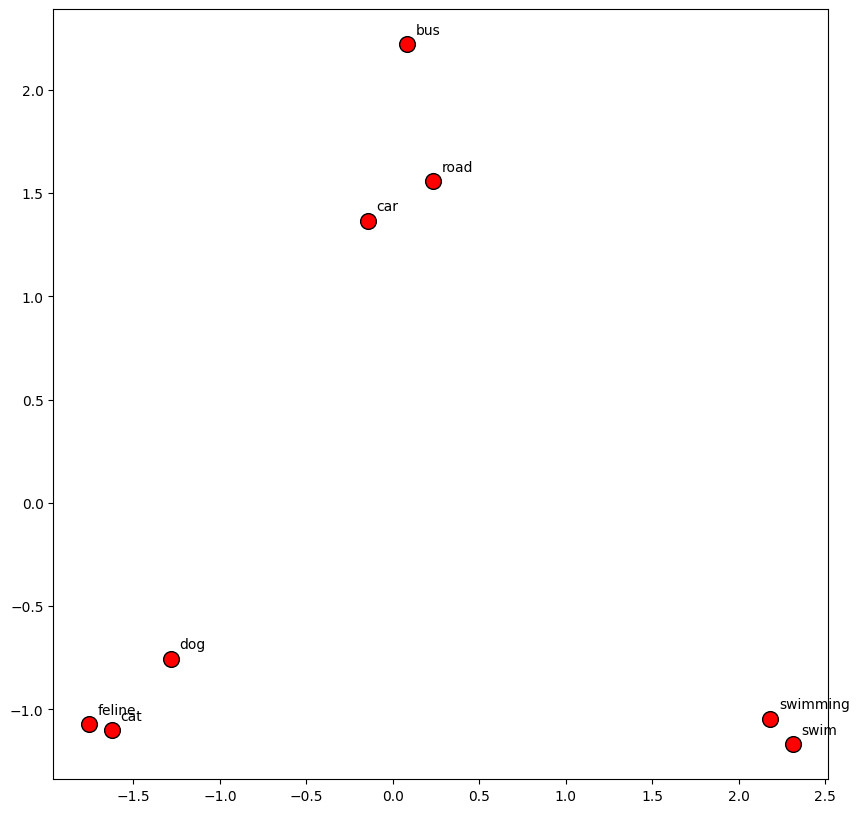

In [ ]:
display_pca_scatterplot(word_vectors, ['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus'])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [ ]:
X_train, y_train = train_news.data, train_news.target
X_test, y_test = test_news.data, test_news.target

In [ ]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

Number of training samples: 11314
Number of test samples: 7532


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text):
    # Tokenize text and remove stop words
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words]
    return " ".join(tokens)

In [ ]:
X_train = [preprocess_text(text) for text in X_train]
X_test = [preprocess_text(text) for text in X_test]

KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Load the 20 Newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=42)

# Convert training data to DataFrame
df_train = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})
df_test = pd.DataFrame({'text': newsgroups_test.data, 'target': newsgroups_test.target})

# Remove missing data
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# Reset index after dropping rows
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Initialize NLTK components
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize NLTK components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join tokens back into text
    processed_text = ' '.join(tokens)
    return processed_text

# Apply preprocessing to training data
df_train['processed_text'] = df_train['text'].apply(preprocess_text)

# Apply preprocessing to test data
df_test['processed_text'] = df_test['text'].apply(preprocess_text)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['processed_text'])

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(df_test['processed_text'])

# Extract target labels
y_train = df_train['target']
y_test = df_test['target']

print(f"Shape of TF-IDF train set: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF test set: {X_test_tfidf.shape}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of TF-IDF train set: (11314, 10000)
Shape of TF-IDF test set: (7532, 10000)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
print(f"Shape of TF-IDF train set: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF test set: {X_test_tfidf.shape}")

Shape of TF-IDF train set: (11314, 10000)
Shape of TF-IDF test set: (7532, 10000)


In [ ]:
svm_clf = SVC(kernel='linear', random_state=42)

In [ ]:
svm_clf.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_clf.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred, target_names=train_news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.44      0.49      0.46       319
           comp.graphics       0.54      0.66      0.59       389
 comp.os.ms-windows.misc       0.62      0.57      0.59       394
comp.sys.ibm.pc.hardware       0.62      0.64      0.63       392
   comp.sys.mac.hardware       0.70      0.64      0.67       385
          comp.windows.x       0.78      0.63      0.70       395
            misc.forsale       0.75      0.76      0.75       390
               rec.autos       0.43      0.71      0.53       396
         rec.motorcycles       0.66      0.73      0.69       398
      rec.sport.baseball       0.79      0.77      0.78       397
        rec.sport.hockey       0.90      0.81      0.85       399
               sci.crypt       0.85      0.65      0.74       396
         sci.electronics       0.53      0.54      0.54       393
                 sci.med       0.75      0.70      0.72       396
         

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6459


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[144   2   2   1   2   1   2  15   7   5   2   1   4   9  18  45  12   9
   13  25]
 [  7 266  22  11   4  18   4  12   3   3   0   2  21   2  11   1   1   0
    1   0]
 [  6  31 232  37  14  14   1  18   5   1   1   4   5   6  10   1   0   2
    5   1]
 [  1  18  40 240  28   6  16  11   0   0   1   2  25   1   2   0   1   0
    0   0]
 [  2  18  10  41 238   1  11  22   3   2   2   2  25   4   3   0   1   0
    0   0]
 [  0  58  39   9   3 252   3  12   5   1   0   4   6   0   1   0   2   0
    0   0]
 [  0   2   4  20  15   1 295  19   6   3   1   1  11   0   7   1   1   1
    1   1]
 [  4   5   2   2   0   2  12 292  25   5   1   0  17   4   7   0   2   4
   10   2]
 [  6   4   0   2   1   1   6  50 280   9   0   0  10   6   9   1   4   0
    7   2]
 [  5   3   0   2   2   1   8  27   6 298  19   0   3   4   4   1   2   4
    8   0]
 [  6   1   1   1   1   1   2  16   9  20 323   2   3   1   2   1   5   0
    2   2]
 [  0   9   5   3   5   1   7  23   6   4   4 

In [ ]:
print(train_news.data[2], train_news.target[1], sep='\n\n')

well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i got the 80Mb disk rather than the 120, but i don't really have
a feel for how much "better" the display is (yea, it looks great in the
store, but is that all "wow" or is it really th

In [ ]:
X_train_ini, y_train, X_val_ini, y_val = train_news.data, train_news.target, test_news.data, test_news.target

In [ ]:
from multiprocessing import Pool, cpu_count

In [ ]:
def remove_stopwords_single(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(tokens)

def remove_stopwords(texts):
    with Pool(cpu_count()) as pool:
        cleaned_texts = pool.map(remove_stopwords_single, texts)
    return cleaned_texts

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def remove_stopwords(texts):
    cleaned_texts = []
    for doc in nlp.pipe(texts, disable=["parser", "ner"]):
        tokens = [token.text for token in doc if not token.is_stop]
        cleaned_texts.append(" ".join(tokens))
    return cleaned_texts

In [ ]:
X_train_ini = remove_stopwords(X_train_ini)
X_val_ini = remove_stopwords(X_val_ini)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()


KeyboardInterrupt: 

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000,
                                               filters='0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                                               lower=True)

In [ ]:
tokenizer.fit_on_texts(X_train_ini)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train_ini)

In [ ]:
print(X_train[0])

[10, 25, 1353, 27, 160, 73, 54, 112, 10510, 67, 15, 17, 295, 10, 88, 246, 12, 25, 4, 1188, 2518, 295, 979, 3, 16, 30, 1, 1169, 43, 43, 12, 25, 283, 4, 1, 3891, 77, 173, 387, 8, 1043, 132, 784, 7907, 25, 1625, 30, 1, 661, 5, 1, 618, 17, 9, 1927, 10, 90, 27, 160, 37, 4, 644, 230, 972, 3275, 2675, 141, 17, 295, 9, 198, 513, 24, 738, 322, 5493, 15, 17, 17403, 330, 295, 207, 66, 195]


In [ ]:
[tokenizer.index_word[x] for x in X_train[7][:3]]

['\nall', 'this', 'shows']

In [ ]:
# Review excerpt reconstructed from integer sequence.
tokenizer.sequences_to_texts([X_train[0]])[0][:300]

'i was wondering if anyone out there could enlighten me on this car i other day it was a door sports car looked to be from the late s s it was called a the doors were really small in addition \nthe front bumper was separate from the rest of the body this is \nall i know if anyone can a model name engin'

In [ ]:
MAX_REVIEW_LEN = 150
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_REVIEW_LEN)

In [ ]:
print(X_train[100])
# print(X_train[1])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0   255
  5780   202    45    22 13400   137    45    13   202    22 13400   137
    45    13   327    22  8834   184    60  3912    45     7    21   202
  6983     7  1303  2086   920   379  8843   899  7447    13  4651    60
    22 19810  2784   920    21   379   313    22  2260  6619  2784    22
  2260   202    45  9620  1937    22  2260    45    22  6620 13401  2086
    22   255    45    60   313  4965    22    45  2858  4965    22   255
    60  1903    45     7   202   554  7447    21   379   313    22   659
   502 13401  2086    22   327   202   920    21   379   313    22 17507
    13   202    22  2829    13   202]


In [ ]:
X_val = tokenizer.texts_to_sequences(X_val_ini)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=MAX_REVIEW_LEN)

In [ ]:
print(tokenizer.word_index['good'])

115


In [ ]:
print(word_vectors['good'][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [ ]:
num_tokens = len(tokenizer.word_index) + 1

embedding_dim = 300
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
  if word_vectors.has_index_for(word):
    embedding_matrix[i] = word_vectors[word].copy()

In [ ]:
embedding_matrix.shape

(157570, 300)

In [ ]:
print(embedding_matrix[tokenizer.word_index['good']][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [ ]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    input_length=MAX_REVIEW_LEN,
    trainable=True
)

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
tf.random.set_seed(0)

model = keras.Sequential()
model.add(embedding_layer)
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tf.random.set_seed(0)

model = keras.Sequential([
    embedding_layer,
    layers.GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
89/89 [==============================] - 116s 1s/step - loss: 2.9642 - accuracy: 0.0768 - val_loss: 2.8746 - val_accuracy: 0.1694
Epoch 2/10
89/89 [==============================] - 111s 1s/step - loss: 2.6978 - accuracy: 0.1439 - val_loss: 2.4253 - val_accuracy: 0.2560
Epoch 3/10
89/89 [==============================] - 114s 1s/step - loss: 2.3042 - accuracy: 0.2320 - val_loss: 2.0838 - val_accuracy: 0.3622
Epoch 4/10
41/89 [============>.................] - ETA: 1:00 - loss: 2.0119 - accuracy: 0.3146

KeyboardInterrupt: 

In [ ]:
tf.random.set_seed(0)

model = keras.Sequential()

num_tokens = len(tokenizer.word_index) + 1
embedding_dim = 300
# The 'trainable' property is True by default.
model.add(layers.Embedding(input_dim=num_tokens,
                           output_dim=embedding_dim,
                           input_length=MAX_REVIEW_LEN))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/20
23/23 [==============================] - 180s 8s/step - loss: 2.9564 - accuracy: 0.0857 - val_loss: 2.7665 - val_accuracy: 0.1094
Epoch 2/20
23/23 [==============================] - 174s 8s/step - loss: 2.6552 - accuracy: 0.1328 - val_loss: 2.5536 - val_accuracy: 0.1779
Epoch 3/20
23/23 [==============================] - 183s 8s/step - loss: 2.2733 - accuracy: 0.2243 - val_loss: 2.2118 - val_accuracy: 0.2600
Epoch 4/20
10/23 [============>.................] - ETA: 1:18 - loss: 1.9260 - accuracy: 0.3230

KeyboardInterrupt: 

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=42)

data = newsgroups_train.data + newsgroups_test.data

# Preprocessing function
def preprocess_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    processed_text = ' '.join(tokens)
    return processed_text

processed_data = [preprocess_text(text) for text in data]


In [ ]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(processed_data)

In [ ]:
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=20, random_state=42)

In [1]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)


NameError: name 'vectorizer' is not defined

In [ ]:
new_texts = ['The term \'fashion\' originates from the Latin word \'Facere,\' which means \'to make,\' and describes the manufacturing, mixing, and wearing of outfits adorned with specific cultural aesthetics, patterns, motifs, shapes, and cuts, allowing people to showcase their group belonging, values, meanings, beliefs, and ways of life. Given the rise in mass production of commodities and clothing at lower prices and global reach, reducing fashion\'s environmental impact and improving sustainability has become an urgent issue among politicians, brands, and consumers']
new_texts_processed = [preprocess_text(text) for text in new_texts]
new_texts_vectorized = vectorizer.transform(new_texts_processed)
topic_distributions = lda.transform(new_texts_vectorized)
print("Topic distributions for new document:")
print(topic_distributions)


Topic distributions for new document:
[[0.00104167 0.00104167 0.00104167 0.00104167 0.14181668 0.00104167
  0.00104167 0.00104167 0.00104167 0.0612923  0.00104167 0.08770295
  0.26639233 0.00104167 0.00104167 0.00104167 0.00104167 0.00104167
  0.00104167 0.42717074]]


In [ ]:
topic_index = topic_distributions.argmax(axis=1)[0]
topic_probability = topic_distributions.max(axis=1)[0]

topic_name = f"Topic #{topic_index}"
print("Predicted Topic:", topic_name)
print("Topic Probability:", topic_probability)

Predicted Topic: Topic #19
Topic Probability: 0.4271707379762057


In [ ]:
import joblib

joblib.dump(lda, 'lda_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    processed_text = ' '.join(tokens)
    return processed_text

In [ ]:
def find_topic(text):
  text = [text]
  text_processed = preprocess_text(text)
  text_vectorized = vectorizer.transform(text_processed)
  topic_distributions = lda.transform(text_vectorized)

  topic_index = topic_distributions.argmax(axis=1)[0]
  topic_probability = topic_distributions.max(axis=1)[0]

  topic_name = f"Topic #{topic_index}"
  print("Predicted Topic:", topic_name)
  print("Topic Probability:", topic_probability)

In [ ]:
find_topic('Hello I am Dhanush')

['Hello I am Dhanush']
